In [1]:
# collect data
import numpy as np
import pandas as pd

data = pd.read_csv("./Plant Impedance/Ch1-all.csv", header=None)
data = np.array(data)
data = np.log(data[:,0:51])
t = data.shape[0]
time = np.linspace(0,t,t)
time = time.reshape((len(time),1))
data = np.concatenate((time, data), axis = 1)

matlab_data = pd.read_csv("./Plant Impedance/parameters_outlierRemoved.csv", header=None)
matlab_data = np.log(np.array(matlab_data))
t = matlab_data.shape[0]
time = np.linspace(0,t,t)
time = time.reshape((len(time),1))
matlab_data = np.concatenate((time, matlab_data), axis = 1)


# Method 1 - Dimensional Reduction, then Feature Extraction, then Regression

In [2]:
import DFE_object

Calculated average on dataset Entry_0 at 2023-05-17 20:00:29.818511.
Calculated variance on dataset Entry_0 at 2023-05-17 20:00:29.854059.
Calculated average on dataset Entry_1 at 2023-05-17 20:00:29.858056.


{'R': 0.95, 'RMSE': 0.18, 'RelRMSE': 0.06, 'MAE': 0.15, 'RAE': 0.36}

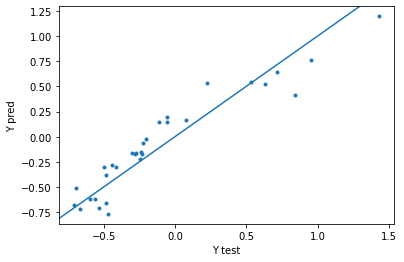

In [3]:
# Create DFE object
dfeo = DFE_object.DFE_object()

# Upload data
dfeo.import_from_pandas(pd.DataFrame(data), t = 0)
dfeo.import_from_pandas(pd.DataFrame(matlab_data[:,[0,1]]), t = 0, y = 1)

# Dimension Reduction: PCA
dfeo.my_PCA("Entry_0")

# Feature Extraction
dfeo.set_window_scheme(length = 30, overlap = 15) # set windowing scheme
dfeo.fe_average("Entry_0")
dfeo.fe_variance("Entry_0")
dfeo.fe_average("Entry_1")

dfeo.normalize("Entry_0_average")
dfeo.normalize("Entry_0_variance")
dfeo.normalize("Entry_1_average")

# Fusion
dfeo.concatenate()

# Regression
dfeo.linear_regression()
dfeo.regression_report()

# Method 2 - Feature Extraction, then Dimensional Reduction, then Regression

Calculated average on dataset Entry_0 at 2023-05-17 20:00:30.382088.
Calculated variance on dataset Entry_0 at 2023-05-17 20:00:30.569590.
Calculated average on dataset Entry_1 at 2023-05-17 20:00:30.585212.


{'R': 0.88, 'RMSE': 0.67, 'RelRMSE': 0.21, 'MAE': 0.43, 'RAE': 0.61}

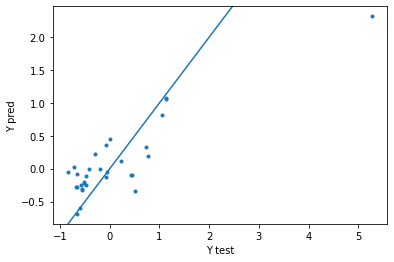

In [4]:
# Create DFE object
dfeo = DFE_object.DFE_object()

# Upload data
dfeo.import_from_pandas(pd.DataFrame(data), t = 0)
dfeo.import_from_pandas(pd.DataFrame(matlab_data[:,[0,1]]), t = 0, y = 1)

# Feature Extraction
dfeo.set_window_scheme(length = 30, overlap = 15) # set windowing scheme
dfeo.fe_average("Entry_0")
dfeo.fe_variance("Entry_0")
dfeo.fe_average("Entry_1")

dfeo.normalize("Entry_0_average")
dfeo.normalize("Entry_0_variance")
dfeo.normalize("Entry_1_average")

# Fusion
dfeo.concatenate()

# Dimension Reduction: PCA
dfeo.my_PCA("active")

# Regression
dfeo.linear_regression()
dfeo.regression_report()

# Method 3 - Feature Extraction, then Dimensional Reduction and Regression Simultaneously

Calculated average on dataset Entry_0 at 2023-05-17 20:00:31.000580.
Calculated variance on dataset Entry_0 at 2023-05-17 20:00:31.172490.
Calculated average on dataset Entry_1 at 2023-05-17 20:00:31.188116.


C:\Users\dmarti22\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.021836551519558878, tolerance: 0.013821993544797653
  model = cd_fast.enet_coordinate_descent(


{'R': 0.97, 'RMSE': 0.19, 'RelRMSE': 0.05, 'MAE': 0.09, 'RAE': 0.18}

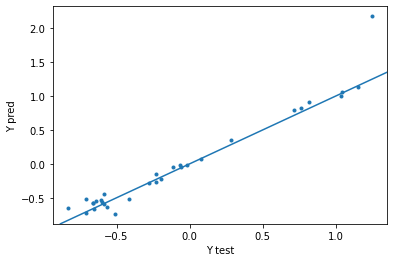

In [5]:
# Create DFE object
dfeo = DFE_object.DFE_object()

# Upload data
dfeo.import_from_pandas(pd.DataFrame(data), t = 0)
dfeo.import_from_pandas(pd.DataFrame(matlab_data[:,[0,1]]), t = 0, y = 1)

# Feature Extraction
dfeo.set_window_scheme(length = 30, overlap = 15) # set windowing scheme
dfeo.fe_average("Entry_0")
dfeo.fe_variance("Entry_0")
dfeo.fe_average("Entry_1")

dfeo.normalize("Entry_0_average")
dfeo.normalize("Entry_0_variance")
dfeo.normalize("Entry_1_average")

# Fusion
dfeo.concatenate()

# Dimension Reduction and Regression: LASSO
dfeo.LASSO(0.003)
dfeo.regression_report()